# TensorFlow Introduction & Object Detection API application


<img src="img/tensorflow.png">

This tutorial shall introduce you to the machine learning framework library called TensorFlow created by Google to design, build and train deep learning models.The basics of TensorFlow will be followed an application to demonstrate how to use the TensorFlow library to classify different monument pictures.

## TensorFlow

TensorFlow is an open source software library which performs numerical computations using data flow graphs. The graph nodes represent mathematical operations and the graph edges represent tensors communicated between them. Tensors are multidimensional arrays and the name “TensorFlow” is derived from the operations which neural networks perform on multidimensional data arrays or tensors. Hence tensorflow is basically a flow of tensors. TensorFlow provides primitives for
defining functions on tensors and automatically computing their derivatives. This flexible architechture allows us to deploy computation to one or more CPUs or GPUs in desktop, server or mobile device with a single API.TensorFLow is useful while conducting machine learning and deep neural network research.

TensorFlow describes computation in the structure of a directed graph in terms of data flow and operations. There are three components to aware of: 

1. Nodes : The nodes have zero or more inputs and outputs and they perform the computation. Data moving between nodes are the tensors (multidimensional arrays of real values ).


2. Edges : The graph defines various things like the flow of data, branching, looping and updates to state. We can use special edges to synchronize behaviour within the graph. An example of a special behaviour would be waiting for the computation on a number of inputs to complete.


3. Operation: The operations are named abstract computations which take attributes as inputs to produce output attributes. An example of an operation would be add or multiply operation.


### Tensor

While writing TensorFlow programs, the main object we manipulate and pass around is tf.Tensor. This object represents a partially defined computation that shall eventually produce some value. The way a TensforFlow program works is first building a graph of tf.Tensor objects, then detailing how each tensor is computed based on the other available tensors and then running parts of this graph to achieve the desired results.

A tf.Tensor object has a datatype (float32, int32, string etc) and a shape. 

The main tensors are :

1. tf.Variable

2. tf.constant

3. tf.placeholder

4. tf.SparseTensor

The value of a tensor (except for tf.Variable) is immutable in the context of a single execution. 

### Computation with TensorFlow

 A Session object in TensorFlow encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated. We create a session, define constants and perform computation with those constants using the session.

In [101]:
import tensorflow as tf
sess = tf.Session()
a = tf.constant(45)
b = tf.constant(23)
print(sess.run(a+b))


68


### Dataflow Graph

TensorFlow uses a dataflow graph to represent the computations in terms of the dependencies between individual operations. This leads to a low-level programming model in which we first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.
In a dataflow graph, the nodes represent units of computation, and the edges represent the data consumed or produced by a computation. For example, in a TensorFlow graph, the tf.matmul operation would correspond to a single node with two incoming edges (the matrices to be multiplied) and one outgoing edge (the result of the multiplication).

<img src="img/tensors_flowing.gif">

Most TensorFlow programs start with a dataflow graph construction phase. In this phase, you invoke TensorFlow API functions that construct new tf.Operation (node) and tf.Tensor (edge) objects and add them to a tf.Graph instance. TensorFlow provides a default graph that is an implicit argument to all API functions in the same context. For example , calling tf.add(x, y) creates a single tf.Operation that multiplies the values of tf.Tensor objects x and y, adds it to the default graph, and returns a tf.Tensor that represents the result of the multiplication.

### Displaying  Computation graph to add two numbers using Tensorboard

In [14]:
import tensorflow as tf

# Define computational graph

##Input Nodes
X=tf.placeholder(tf.float32, name="x")
Y=tf.placeholder(tf.float32, name="y")


## Operation node 
# This node adds two tensors X and Y which are passed to it.
addition = tf.add(X,Y,name="addition")

## Create the session
# We need session to run any operation in the computation graph
# In this case we need session to run the addition operation/node
#We can pass values to Input nodes X and Y when we run addition operation using the session object
with tf.Session() as session:
    result=session.run(addition,feed_dict={X:[15,12,31],Y:[20,16,17]})
    # create an event file in a given directory and add Graph to it
    writer = tf.summary.FileWriter("./logs/add_num",session.graph)
    print(result)

[35. 28. 48.]


Now we will find that a logs folder has been created with another add_num folder inside this. This folder has the events file of the form

In [ ]:
events.out.tfevents.1522102348.DESKTOP-RPV8619 


To run the event file we need TensorBoard

### TensorBoard

Run the command on the terminal to see the tensorboard 

In [ ]:
tensorboard --logdir = logs

It prints TensorBoard 1.6.0 at http://DESKTOP-RPV8619:6006 (Press CTRL+C to quit) using which you can view the computational graph in Tensorboard

<img src="img/addition_input_node.png">

<img src="img/y_placeholder.png">

# Linear Regression with TensorFlow


A simple example of linear function can be useful to understand the basic mechanism behind TensorFlow. We generate random data points and define a linear relation. We shall use TensorFlow to adjust and get the right parameters.


In [93]:
import numpy as np
# Create 100 random x, y data points in NumPy, y = x * 0.5 + 0.7
x_data = np.random.rand(100).astype(np.float32)

In [94]:
#The equation of the model used is Y= 0.5 X + 0.7
y_data = x_data * 0.5 + 0.7

In [95]:
# We try to find values for V and b that compute y_data = V * x_data + b
# (We know that V should be 0.5 and b 0.7, but Tensorflow will compute that out for us.)

V = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = V * x_data + b

In [96]:
#We minimize the squared error of the equation To find Loss value we use tf.reduce_mean(). 
#This function finds the mean of a multidimensional tensor and the result can have a different dimension.
loss = tf.reduce_mean(tf.square(y - y_data))

In [97]:
#Then we define the optimizer method. Here we will use a simple gradient descent with a learning rate of 0.5. 
#Now we define the training method of our graph. We use the tf.train.GradientDescentOptimizer minimize() function will minimize the error function of our optimizer and the result shall be a better model.
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [98]:
#We need to initialize the variables before we execute the graph
# Before starting, we shall initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# we launch the graph.
sess = tf.Session()
sess.run(init)

In [99]:
#We now start the optimization and run the graph
train_data=[]
for step in range(201):
    evals= sess.run([train,V,b])[1:]
    if step % 20 == 0:
        print(step, evals)
        train_data.append(evals)

# We learn that the best fit is V=: [0.5], b: [0.7]

0 [array([0.5858835], dtype=float32), array([0.90854704], dtype=float32)]
20 [array([0.4942902], dtype=float32), array([0.70310307], dtype=float32)]
40 [array([0.49846175], dtype=float32), array([0.70083594], dtype=float32)]
60 [array([0.49958563], dtype=float32), array([0.7002252], dtype=float32)]
80 [array([0.4998884], dtype=float32), array([0.7000606], dtype=float32)]
100 [array([0.49996996], dtype=float32), array([0.7000163], dtype=float32)]
120 [array([0.4999919], dtype=float32), array([0.7000044], dtype=float32)]
140 [array([0.49999782], dtype=float32), array([0.7000012], dtype=float32)]
160 [array([0.49999943], dtype=float32), array([0.7000003], dtype=float32)]
180 [array([0.4999997], dtype=float32), array([0.70000017], dtype=float32)]
200 [array([0.4999997], dtype=float32), array([0.70000017], dtype=float32)]


# Object Detection API & TensorFlow Application : Monument Detection

The purpose is to train our own convolutional network object detection classifier for various monuments. The final result of the application I present is a trained classifier for various monuments that can identify and draw boxes around 8 specific monuments in the images.


### Installation

#### Step 1:

Set up a new Anaconda Virtual Environment for tensorflow-gpu. In the Anaconda prompt terminal type  and activate it

In [ ]:
C:\> conda create -n tensorflow1 pip
C:\> activate tensorflow1

Use TensorFlow-GPU for faster training and processing of our model. Use the following commands to install TensorFlow and TensorFlow-GPU :

In [ ]:
(tensorflow1) C:\> pip install tensorflow 
(tensorflow1) C:\> pip install --ignore-installed --upgrade tensorflow-gpu

Install the other necessary packages required:

In [ ]:
(tensorflow1) C:\> conda install -c anaconda protobuf
(tensorflow1) C:\> pip install pillow
(tensorflow1) C:\> pip install lxml
(tensorflow1) C:\> pip install jupyter
(tensorflow1) C:\> pip install matplotlib
(tensorflow1) C:\> pip install pandas
(tensorflow1) C:\> pip install opencv-python

Download and install CUDA v9.0 and cuDNN v7.0 from https://developer.nvidia.com/cuda-downloads and 
https://developer.nvidia.com/cudnn


#### Step 2 :

Create a folder directly in C directory and name it tensorflow1.

Download the TensorFlow object detection respository from  https://github.com/tensorflow/models and extract the models-master and place it in the C:\tensorflow1 directory just created.

    

#### Step 3:

Configure the PATH variable by adding \models-master, \models-master\research and \models-master\research\slim directories by adding a new environment variable.

In [ ]:
(tensorflow1) C:\> set PYTHONPATH=C:\tensorflow1\models-master;C:\tensorflow1\models-master\research;C:\tensorflow1\models-master\research\slim
(tensorflow1) C:\> set PATH=%PATH%;PYTHONPATH

Note : Every time we exit the "tensorflow1" environment, the PATH and PYTHONPATH variables are reset and we need to set them up again.


#### Step 4:

From the https://github.com/google/protobuf/releases page download the protoc-3.4.0-win32.zip and extract it. Find the protoc.exe in the bin directory. Create a protoc directory in Program files and keep this inside it.

In Anaconda prompt go to models-master and use the protoc command to compile the Protobuf files which are used by TensorFlow to configure model and training parameters: 

In [ ]:
"C:/Program Files/protoc/bin/protoc" object_detection/protos/*.proto --python_out=.

#### Step 5:
    Finally run the following commands from the C:\tensorflow1\models-master\research directory to setup and build :

In [ ]:
(tensorflow1) C:\tensorflow1\models-master\research> python setup.py build
(tensorflow1) C:\tensorflow1\models-master\research> python setup.py install

### Procedure Steps

    1. Collect images

    2. Split into train and test set folders

    3. Label the images using LabelImg. 

    4. Generate TF records from these two sets

    5. Setup a .config file for the model

    6. Train the model

    7. Export the inference graph of the trained model

    8. Detect the monument object from the test images


### Data Collection

We shall be creating a monument detection model. Collect around 500 images of monuments from Google Images and annotate/label them using LabelImg. 

Download and extract zip file from https://github.com/tzutalin/labelImg and following the instructions in the link to install.


Create labels of images by drawing boxes around objects.The label program automatically creates an XML file that describes the objects in the picture.


<img src="img/labelimg.png">
<img src="img/xml_image.png">



Create a folder images and within that two folders train and test. Put 90% images in train and 10% images in test
Create a folder object-detection and put the images folder in it.


### Convert the xml files to csv files for train and test data

We use the https://github.com/datitran/raccoon_dataset/blob/master/xml_to_csv.py file to do that. Download the xml_to_csv.py and keep it in the object-detection folder. Also create a data folder and a training folder in the object-detection folder.

Replace the main with the following

In [ ]:
for directory in ['train','test']:
    image_path = os.path.join(os.getcwd(), 'images/{}'.format(directory))
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('data/{}_labels.csv'.format(directory), index=None)
    print('Successfully converted xml to csv.')

This converts the xml files to csv files and store the csv files called train_labels and test_labels in the data folder.

Download the https://github.com/datitran/raccoon_dataset/blob/master/generate_tfrecord.py and keep it in object-detection folder.
Replace the function class_text_to_int of generate_tfrecord.py with your own label map function. In my case, the label class names are names of eight monuments.

In [100]:
def class_text_to_int(row_label):
    if row_label == 'Petra, Jordan':
        return 1
    if row_label == 'Taj Mahal, India':
        return 2
    if row_label == 'Statue of Liberty, USA':
        return 3
    if row_label == 'Machu Picchu, Peru':
        return 4
    if row_label == 'Golden Gate Bridge, San Francisco':
        return 5
    if row_label == 'Eiffel Tower, Paris':
        return 6
    if row_label == 'Colosseum, Rome':
        return 7
    if row_label == 'Big Ben, London':
        return 8
    else:
        None
#You can change the label and class names according to your model 
#but make sure to start from 1 and not 0 since 0 is a placeholder.

We shall be using the concept of transfer learning so that the training is quicker because training a model completely from scratch could be time consuming. Tensorflow has some pre-trained models with checkpoint files and their configuration files available for use.

https://github.com/tensorflow/models/tree/master/research/object_detection/models contains a list of such pre-trained models with checkpoint files

https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs contains their configuration files.

For our model we download and extract ssd_mobilenet_v1_coco_2017_11_17 model folder from http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz

and the configuration file to be edited for our model from https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_mobilenet_v1_pets.config

We keep the ssd_mobilenet_v1_coco_2017_11_17 folder in the object-detection folder and keep the ssd_mobilenet_v1_pets.config file in the training folder.

### Edit the config file

First change the number of classes of the model to the number of labels. In my case I change it to 8.

In [ ]:
model {
      ssd {
           num_classes: 8

Next change the fine_tune_checkpoint to the checkpoint in our ssd_mobilenet_v1_coco_2017_11_17 model folder.

In [ ]:
fine_tune_checkpoint: "ssd_mobilenet_v1_coco_2017_11_17/model.ckpt"

In the train_input_reader , change the input path to

In [ ]:
input_path: "data/train.record"

change the label map path to 

In [6]:
label_map_path: "training/object-detection.pbtxt"

In the eval_input_reader , change the input path to 

In [ ]:
input_path: "data/test.record"

change the label map path to 

In [ ]:
label_map_path: "training/object-detection.pbtxt"

Move the 3 folders ( data, images, training and ssd_mobilenet_v1_coco_2017_11_17) to the

C:\tensorflow1\models-master\research\object_detection directory we created in the beginning.
Copy the train_labels, test_labels, train.record and test.record to the

C:\tensorflow1\models-master\research\object_detection\data directory that is already present.
Training

## Training

Now we are ready to train the model ! Use the following command from the anaconda prompt from (tensorflow1)

C:\tensorflow1\models-master\research\object_detection> directory to start training the model.


In [ ]:
 python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config

Once your model starts running , you shall get a similar output to mine:

<img src="img/training_start.png">

As you can see the steps start at 1 and the loss shown here is the average loss and is much higher in the beginning. Our goal should be to make loss reach about 1.

We can load up TensorBoard and check how our model is performing using the new event files in our object-detection/training directory.

We open up a new anaconda prompt and activate tensorflow1 environment using command :
        

In [ ]:
activate tensorflow1 

move to the C:\tensorflow1\models-master\research\object_detection directory. Here we use the command 

In [ ]:
tensorboard --logdir='training'

This prints something similar to:

In [ ]:
 TensorBoard 1.6.0 at http://DESKTOP-RPV8619:6006 (Press CTRL+C to quit)

Here is my total loss graph :

<img src="img/loss_graph.png">
 
Once the average loss is under 2 and training is complete you can export the inference graph.

From the object_detection folder use the following command to export the inference graph

In [ ]:
 python export_inference_graph.py 
    --input_type image_tensor 
    --pipeline_config_path training/ssd_mobilenet_v1_pets.config 
    --trained_checkpoint_prefix training/model.ckpt-11456 
    --output_directory monument_inference_graph

Replace 11456 with the highest numbered .ckpt file in the training folder.
This creates a frozen_inference_graph in a new directory called monument_inference_graph.

We keep some images from our test folder inside the test_images folder in the object_detection directory to make our classification of monuments.


### Generating TF records 

Use these command from the object-detection folder to create train.record and test.record
files:

In [ ]:
python generate_tfrecord.py --csv_input=data/train_labels.csv --output_path=data/train.record
python generate_tfrecord.py --csv_input=data/test_labels.csv --output_path=data/test.record

### Creating Label Map


    
We need to set up the configuration file and create a pre-trained model for the monument detection.
Inside the training directory we also create a object-detection.pbtxt file which contains label map.

Inside the file place this snippet :

In [ ]:
    item{
     id:  1
     name: 'Petra, Jordan'
    }

    item {
     id: 2
     name: 'Taj Mahal, India'
    }

    item {
     id: 3
     name: 'Statue of Liberty, USA'
    }

    item {
     id: 4
     name: 'Machu Picchu, Peru'
    }

    item {
     id: 5
     name: 'Golden Gate Bridge, San Francisco'
    }

    item {
     id: 6
     name: 'Eiffel Tower, Paris'
    }

    item {
     id: 7
     name: 'Colosseum, Rome'
    }

    item {
     id: 8
     name: 'Big Ben, London'
    }

### Some useful Imports

In [74]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if tf.__version__ < '1.4.0':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')


### Environment set up

In [75]:
# This is needed to display the images.
%matplotlib inline

In the C:\tensorflow1\models-master\research\object_detection directory there is a object_detection_tutorial.ipynb file. The complete source code can also be found at https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

I have downloaded the file and used it as object_detection_tutorial.py to reference its two functions load_image_into_numpy_array and run_inference_for_single_image

We can use this so see how well our model has trained. I am keeping the relevant functionalities in this tutorial from the object_detection_tutorial.ipynb to show how our well the model I trained is performing on the test data.

### Object detection imports

In [76]:
from utils import label_map_util

from utils import visualization_utils as vis_util

from object_detection_tutorial import load_image_into_numpy_array,run_inference_for_single_image

### Model preparation

1. Change the model name to the name of our inference graph folder

2. Change the path to checkpoint to the frozen inference graph

3. Change the path to labels to the mapping we created previously in the object-detection.pbtxt kept in the training folder

4. Change the number of classes to our desired number of classes





In [77]:
# Our model that we just created.
MODEL_NAME = 'monument_inference_graph'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

NUM_CLASSES = 8

### Load our (frozen) Tensorflow model into memory

In [78]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

### Loading label map

In [79]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

### Using Object Detection API 

Adjust the range of the test images to pick images desired from the test_images folder

In [113]:

# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(6, 14) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

The function call run_inference_for_single_image for each test image through our inference graph to classify them.

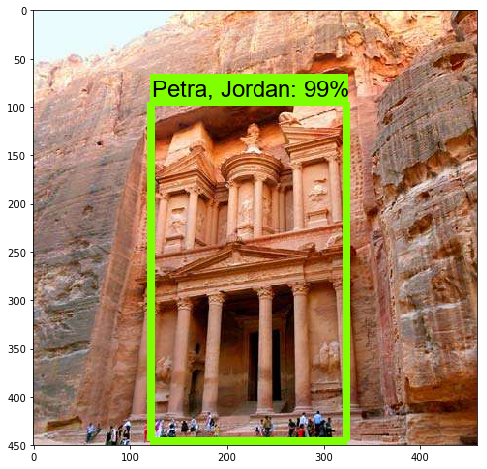

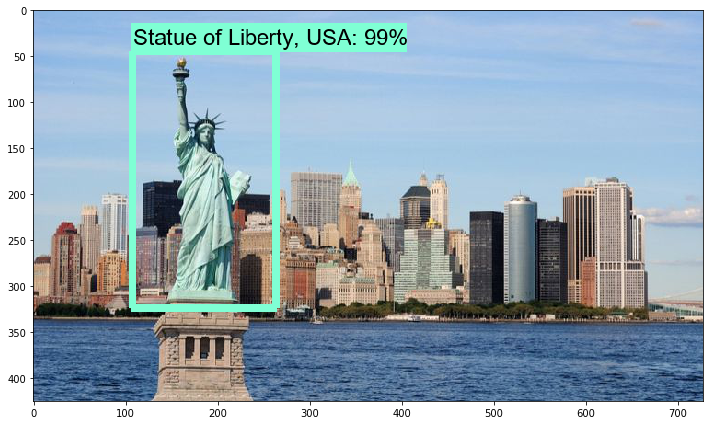

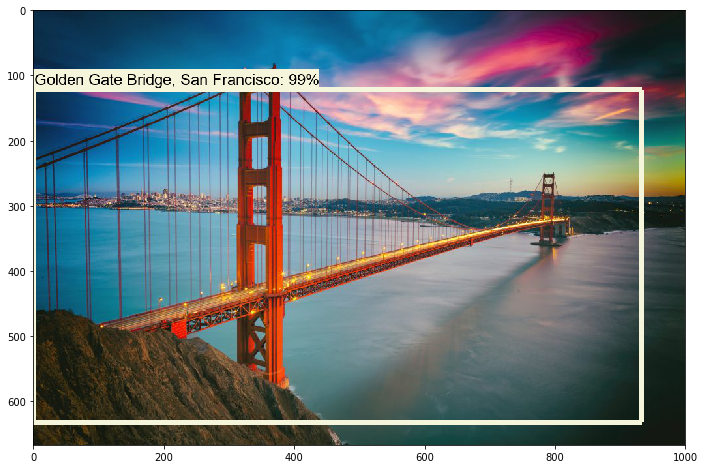

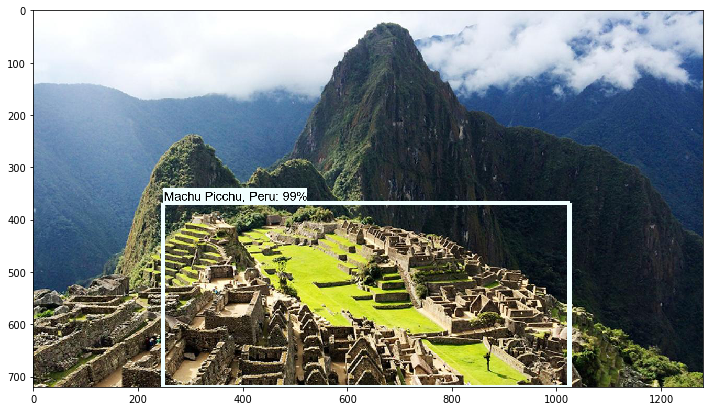

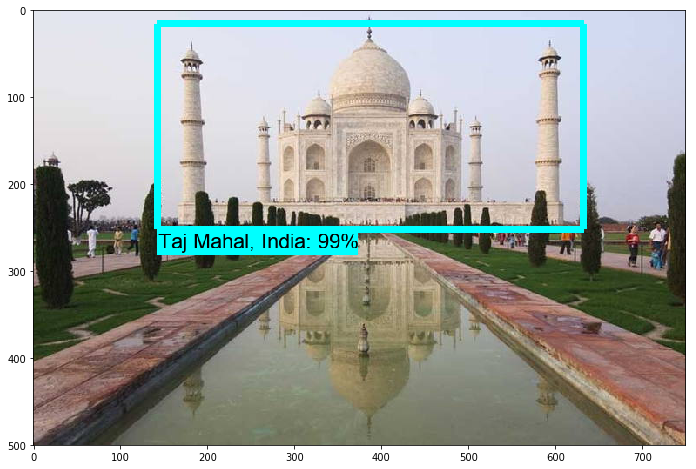

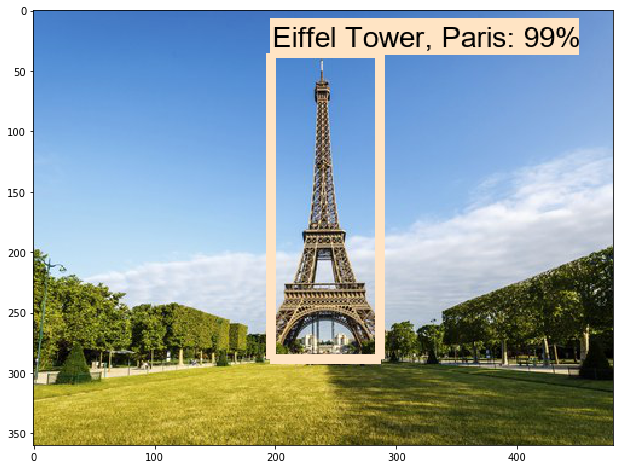

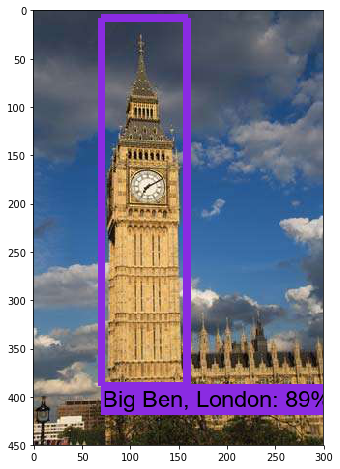

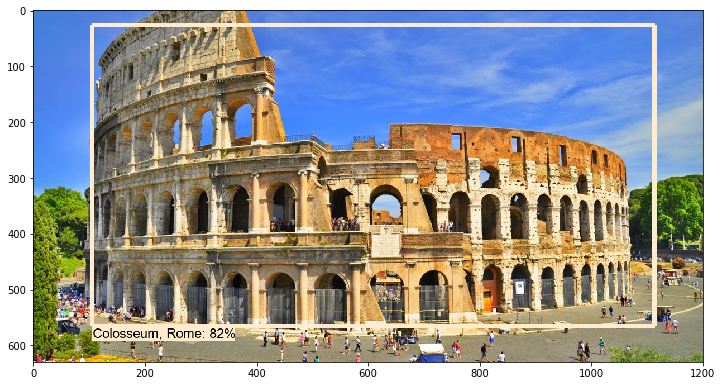

In [115]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

References
1. https://www.tensorflow.org/get_started/
2. https://www.tensorflow.org/programmers_guide/graphs
3. https://www.youtube.com/watch?v=sNRCiBsYBwQ
4. https://www.youtube.com/watch?v=xlD8FIM5biA
5. https://www.datacamp.com/community/tutorials/tensorflow-tutorial
6. https://machinelearningmastery.com/introduction-python-deep-learning-library-tensorflow/
7. https://pythonprogramming.net/custom-objects-tracking-tensorflow-object-detection-api-tutorial/
8. https://pythonprogramming.net/creating-tfrecord-files-tensorflow-object-detection-api-tutorial/
9. https://pythonprogramming.net/training-custom-objects-tensorflow-object-detection-api-tutorial/
10. https://pythonprogramming.net/testing-custom-object-detector-tensorflow-object-detection-api-tutorial/
11. https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10#2-set-up-tensorflow-directory-and-anaconda-virtual-environment
12. https://www.youtube.com/watch?v=zNalsMIB3NE
13. https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb
